In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values  # Features
Y_train = train_data['label'].values  # Labels
X_test = test_data.iloc[:, 1:].values  # Test features
Y_test = test_data['label'].values  # Test labels

# Normalize the features (scaling between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the number of classes and features
num_classes = 10
num_features = X_train.shape[1]

# Initialize model parameters (weights and biases) for each class
weights = np.random.rand(num_classes, num_features)
biases = np.zeros(num_classes)

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum()

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, y_pred)
    y_pred = np.minimum(1 - epsilon, y_pred)
    return -np.sum(y_true * np.log(y_pred))

# Gradient descent update
def update_parameters(weights, biases, X, Y, Y_pred, learning_rate):
    dw = np.outer(Y_pred - Y, X)
    db = Y_pred - Y
    weights -= learning_rate * dw
    biases -= learning_rate * db
    return weights, biases

# Training loop
def train(X, Y, weights, biases, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i]
            y = Y[i]

            # Compute the logits (linear combination) for each class
            Z = np.dot(weights, x) + biases

            # Compute softmax probabilities
            Y_pred = softmax(Z)

            # Update parameters for the correct class
            weights, biases = update_parameters(weights, biases, x, (np.arange(num_classes) == y).astype(int), Y_pred, learning_rate)

        if (epoch + 1) % 100 == 0:
            # Calculate and print accuracy
            Y_train_pred = predict(X, weights, biases)
            train_accuracy = evaluate_accuracy(Y, Y_train_pred)
            print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.2%}")

    return weights, biases

# Make predictions
def predict(X, weights, biases):
    Z = np.dot(X, weights.T) + biases
    Y_pred = np.array([softmax(z) for z in Z])
    return np.argmax(Y_pred, axis=1)

# Evaluate the model
def evaluate_accuracy(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

# Example usage
learning_rate = 0.01
epochs = 1000

weights, biases = train(X_train, Y_train, weights, biases, learning_rate, epochs)

Y_pred = predict(X_test, weights, biases)
accuracy = evaluate_accuracy(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2%}")


Epoch 100/1000, Training Accuracy: 92.38%
Epoch 200/1000, Training Accuracy: 92.45%
Epoch 300/1000, Training Accuracy: 92.50%
Epoch 400/1000, Training Accuracy: 92.55%
Epoch 500/1000, Training Accuracy: 92.59%
Epoch 600/1000, Training Accuracy: 92.60%
Epoch 700/1000, Training Accuracy: 92.60%
Epoch 800/1000, Training Accuracy: 92.62%
Epoch 900/1000, Training Accuracy: 92.65%
Epoch 1000/1000, Training Accuracy: 92.66%
Test Accuracy: 91.07%


In [29]:
# Save model parameters to parameters.txt
#np.savetxt('/content/drive/MyDrive/dataset/parameters.txt', np.concatenate((weights, biases[:, np.newaxis]), axis=1))
# Create a new file for model parameters
file_path = '/content/drive/MyDrive/dataset/model_parameters.txt'
num_weight_parameters = weights.size
num_biases = biases.size
# Save model parameters to parameters.txt
with open(file_path, 'w') as file:
    file.write("WEIGHTS:\n")
    np.savetxt(file, weights)
    file.write("\nBIASES:\n")
    np.savetxt(file, biases)
    file.write(f"Number of Weight Parameters: {num_weight_parameters}\n")
    file.write(f"Number of Biases: {num_biases}\n")
print(f"Model parameters saved to {file_path}")
# Calculate the number of weight parameters and biases

print(f"Number of Weight Parameters: {num_weight_parameters}")
print(f"Number of Biases: {num_biases}")

Model parameters saved to /content/drive/MyDrive/dataset/model_parameters.txt
Number of Weight Parameters: 7840
Number of Biases: 10


In [21]:
import pickle
# After training the model, save the weights and biases
model_parameters = {
    "weights": weights,
    "biases": biases
}
with open("/content/drive/MyDrive/dataset/model.pkl", "wb") as model_file:
    pickle.dump(model_parameters, model_file)

In [22]:
# To load the model, you can use the following code:

with open("/content/drive/MyDrive/dataset/model.pkl", "rb") as model_file:
    loaded_model_parameters = pickle.load(model_file)

loaded_weights = loaded_model_parameters["weights"]
loaded_biases = loaded_model_parameters["biases"]


In [25]:
Y_pred = predict(X_test, weights, biases)
accuracy = evaluate_accuracy(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2%}")


Test Accuracy: 91.07%


Confusion Matrix:


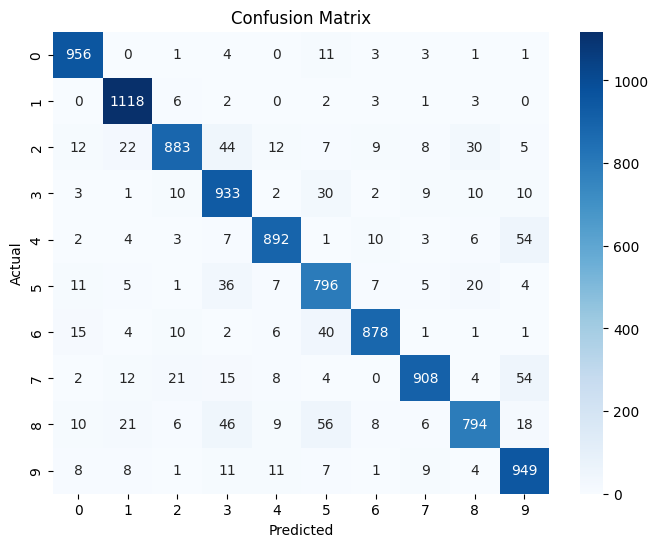

In [23]:
# Calculate and print the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_test_pred = predict(X_test, loaded_weights,loaded_biases)

confusion = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:")
#print(confusion)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()